# Workshop 4: Numerical Errors and Stability

## Exercise 1: Quadratic Equation Stability

Consider the quadratic equation $x^2 + 2px - q = 0$ with $p=10^5$ and $q=10^{-i}$, $i=0,..,10$

1. Determine if the problem of calculating the solution $x= -p+\sqrt{p^2+q}$ is well-conditioned for all given q values
2. Calculate the solution x using the formula above and determine if the algorithm is numerically stable
3. Find a stable form for calculating the solution and verify its stability

Unstable solutions: [4.99999442e-06 5.00003807e-07 5.00003807e-08 4.99130692e-09
 4.94765118e-10 4.36557457e-11 1.45519152e-11 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Stable solutions: [5.e-06 5.e-07 5.e-08 5.e-09 5.e-10 5.e-11 5.e-12 5.e-13 5.e-14 5.e-15
 5.e-16]


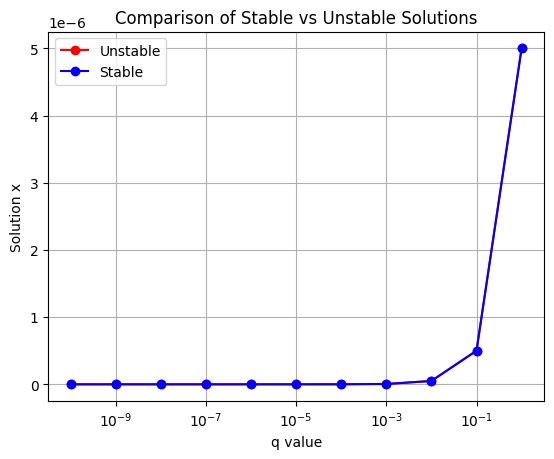

In [1]:
import matplotlib.pyplot as plt
import numpy as np

i = np.arange(0, 11, 1)
p = 10**5
q = 1 / 10**i

unstable_sol = -p + np.sqrt(p**2 + q)

stable_sol = q / (p + np.sqrt(p**2 + q))

print("Unstable solutions:", unstable_sol)
print("Stable solutions:", stable_sol)

plt.semilogx(q, unstable_sol, 'ro-', label='Unstable')
plt.semilogx(q, stable_sol, 'bo-', label='Stable')
plt.xlabel('q value')
plt.ylabel('Solution x')
plt.title('Comparison of Stable vs Unstable Solutions')
plt.legend()
plt.grid(True)
plt.show()

## Exercise 2: Function Evaluation Stability

Analyze the stability of computing the function:
$$f(x) = \frac{(1+x)-1}{x}$$
for $x=10^{-i}$ with $i=1,2,...,20$

1. Determine if the problem is well-conditioned
2. Experimentally verify the numerical stability of the evaluation algorithm

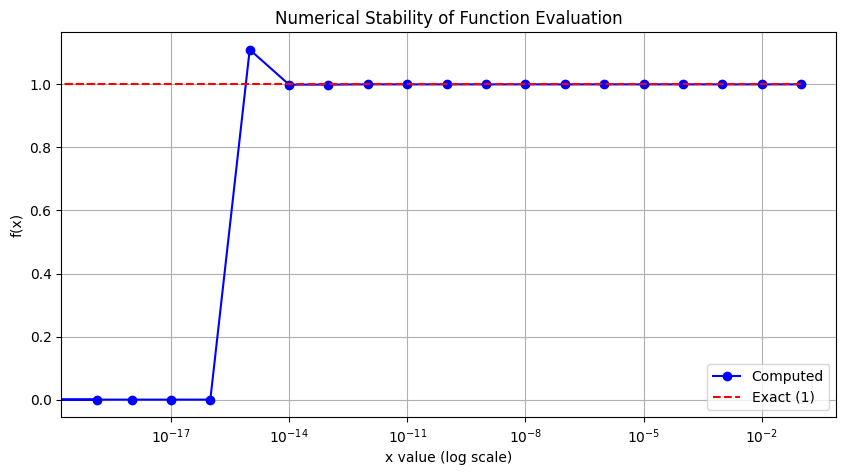

Computed values: [ 1.          1.          1.          1.          1.          1.
  1.          0.99999999  1.00000008  1.00000008  1.00000008  1.0000889
  0.99920072  0.99920072  1.11022302  0.          0.          0.
 -0.          0.        ]


In [2]:
import matplotlib.pyplot as plt
import numpy as np

f = lambda x: ((1 + x) - 1) / x
x = 1 / 10**(np.arange(1, 21))

results = f(x)
exact = np.ones_like(x)

plt.figure(figsize=(10,5))
plt.semilogx(x, results, 'bo-', label='Computed')
plt.semilogx(x, exact, 'r--', label='Exact (1)')
plt.xlabel('x value (log scale)')
plt.ylabel('f(x)')
plt.title('Numerical Stability of Function Evaluation')
plt.legend()
plt.grid(True)
plt.show()

print("Computed values:", results)

## Exercise 3: Archimedes' Method for π Approximation

Implement Archimedes' algorithm for approximating π:

1. Implement the basic algorithm and plot the sequence
2. Calculate and plot relative errors
3. Propose a stabilized version
4. Compare both versions

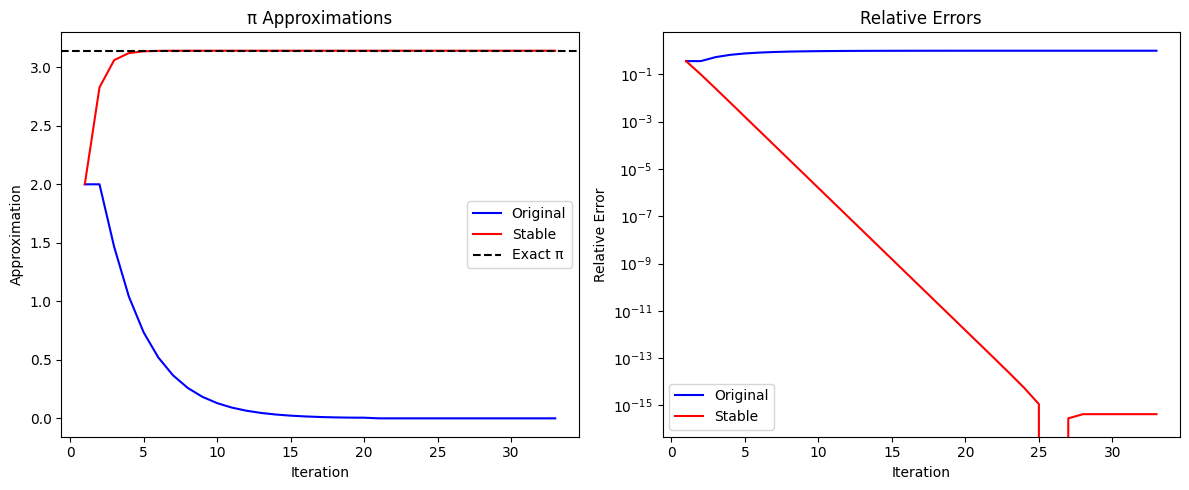

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

n = 34

b = np.zeros(n)
s = np.zeros(n)
p = np.zeros(n)
b[0] = 2
s[0] = 1

for i in range(1, n):
    p[i] = b[i-1] * s[i-1]
    b[i] = 2 * b[i-1]
    s[i] = np.sqrt(1.0 - np.sqrt(1 - s[i-1]**2))/2.0

bs = np.zeros(n)
ss = np.zeros(n)
ps = np.zeros(n)
bs[0] = 2
ss[0] = 1

for i in range(1, n):
    ps[i] = bs[i-1] * ss[i-1]
    bs[i] = 2 * bs[i-1]
    ss[i] = ss[i-1] / np.sqrt(2 * (1 + np.sqrt(1 - ss[i-1]**2)))

exact_pi = math.pi
error_original = np.abs(p[1:n] - exact_pi)/exact_pi
error_stable = np.abs(ps[1:n] - exact_pi)/exact_pi

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(range(1,n), p[1:n], 'b-', label='Original')
plt.plot(range(1,n), ps[1:n], 'r-', label='Stable')
plt.axhline(y=exact_pi, color='k', linestyle='--', label='Exact π')
plt.xlabel('Iteration')
plt.ylabel('Approximation')
plt.title('π Approximations')
plt.legend()

plt.subplot(1,2,2)
plt.semilogy(range(1,n), error_original, 'b-', label='Original')
plt.semilogy(range(1,n), error_stable, 'r-', label='Stable')
plt.xlabel('Iteration')
plt.ylabel('Relative Error')
plt.title('Relative Errors')
plt.legend()

plt.tight_layout()
plt.show()

## Exercise 4: Exponential Series Approximation

Compute the exponential function using its series expansion truncated at N=100 terms for x ∈ [-10, 10]:

1. Compute using direct series summation
2. Calculate relative errors
3. Implement a more stable algorithm using $e^{-x} = 1/e^{|x|}$

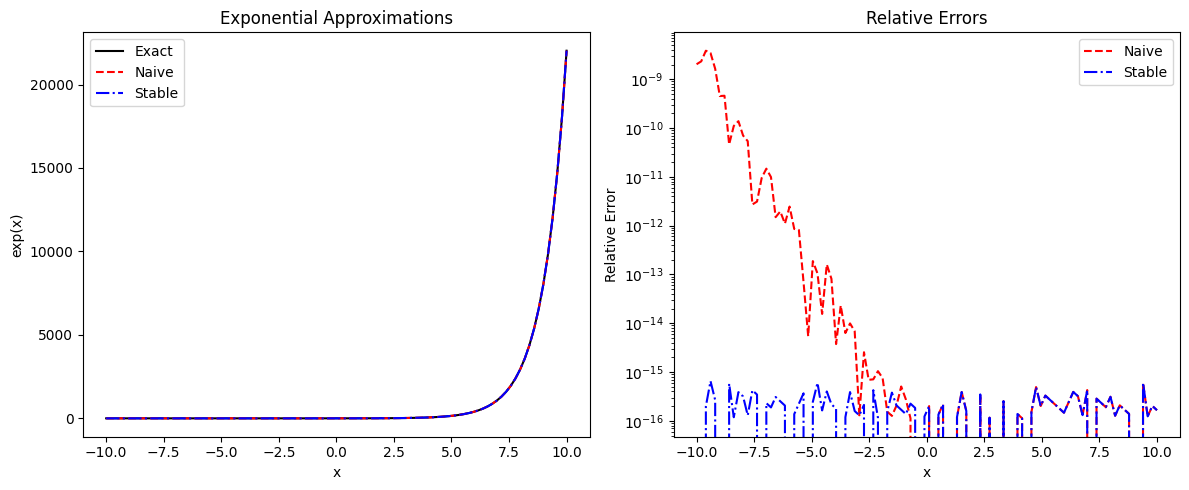

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def exp_series(x, N=100):
    """Compute exponential using series expansion"""
    result = 0.0
    term = 1.0
    for k in range(N):
        result += term
        term *= x/(k+1)
    return result

def stable_exp(x, N=100):
    """More stable exponential calculation"""
    if x >= 0:
        return exp_series(x, N)
    else:
        return 1 / exp_series(-x, N)

x_values = np.linspace(-10, 10, 100)
exact = np.exp(x_values)
naive = np.array([exp_series(x) for x in x_values])
stable = np.array([stable_exp(x) for x in x_values])

error_naive = np.abs(naive - exact)/exact
error_stable = np.abs(stable - exact)/exact

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(x_values, exact, 'k-', label='Exact')
plt.plot(x_values, naive, 'r--', label='Naive')
plt.plot(x_values, stable, 'b-.', label='Stable')
plt.xlabel('x')
plt.ylabel('exp(x)')
plt.title('Exponential Approximations')
plt.legend()

plt.subplot(1,2,2)
plt.semilogy(x_values, error_naive, 'r--', label='Naive')
plt.semilogy(x_values, error_stable, 'b-.', label='Stable')
plt.xlabel('x')
plt.ylabel('Relative Error')
plt.title('Relative Errors')
plt.legend()

plt.tight_layout()
plt.show()

## Exercise 5: Numerical Differentiation

Approximate the derivative of f(x) = sin(x) at x=1 using finite differences:
$$f'(x) \approx \frac{f(x+h)-f(x)}{h}$$

for decreasing h values, comparing with the exact derivative cos(1)

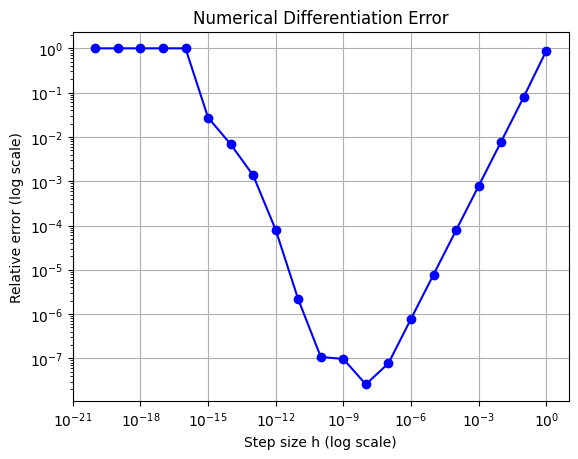

Exact derivative: 0.5403023058681398
Approximate derivatives: [0.06782644 0.49736375 0.53608598 0.53988148 0.54026023 0.5402981
 0.54030189 0.54030226 0.54030229 0.54030236 0.54030225 0.54030114
 0.54034555 0.53956839 0.54400928 0.55511151 0.         0.
 0.         0.         0.        ]
Relative errors: [8.74465755e-01 7.94713494e-02 7.80364031e-03 7.78870464e-04
 7.78720525e-05 7.78705223e-06 7.78724808e-07 7.74153481e-08
 2.60448925e-08 9.72442009e-08 1.08237621e-07 2.16305585e-06
 8.00296731e-05 1.35834308e-03 6.86092981e-03 2.74091121e-02
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00]


In [5]:
import numpy as np
import matplotlib.pyplot as plt

k = np.arange(0, -21, -1)
h = 10.0**k
x = 1

f = lambda x: np.sin(x)
df_exact = np.cos(x)
df_approx = (f(x + h) - f(x)) / h

rel_error = np.abs(df_approx - df_exact) / np.abs(df_exact)

plt.loglog(h, rel_error, 'bo-')
plt.xlabel('Step size h (log scale)')
plt.ylabel('Relative error (log scale)')
plt.title('Numerical Differentiation Error')
plt.grid(True)
plt.show()

print("Exact derivative:", df_exact)
print("Approximate derivatives:", df_approx)
print("Relative errors:", rel_error)

## Exercise 6: Polynomial Evaluation Methods

Compare polynomial evaluation methods:

1. Implement Horner's method
2. Implement standard evaluation
3. Evaluate two polynomials on large point sets
4. Compare results and performance

Polynomial 1 evaluation times - Standard: 0.0200s, Horner: 0.0097s


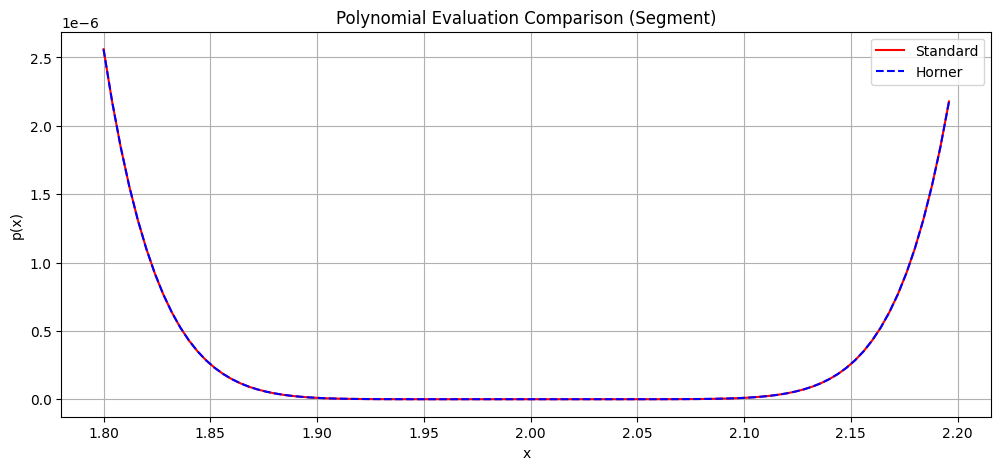

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time

def standard_poly(a, x):
    """Standard polynomial evaluation"""
    p = a[0] * np.ones_like(x)
    x_power = np.ones_like(x)
    for i in range(1, len(a)):
        x_power *= x
        p += a[i] * x_power
    return p

def horner(a, x):
    """Horner's method for polynomial evaluation"""
    n = len(a)
    p = a[-1] * np.ones_like(x)
    for i in range(2, n+1):
        p = p * x + a[-i]
    return p

a1 = np.array([256, -1024, 1792, -1792, 1120, -448, 112, -16, 1])
x1 = np.linspace(1.8, 2.2, 1000000)

a2 = np.array([1, -4, 12, -7, 28, 0, -8, 0, 0, 0, 0, 1])
x2 = np.linspace(-5, 5, 1000000)

start = time.time()
p1_std = standard_poly(a1, x1)
t_std1 = time.time() - start

start = time.time()
p1_hor = horner(a1, x1)
t_hor1 = time.time() - start

print(f"Polynomial 1 evaluation times - Standard: {t_std1:.4f}s, Horner: {t_hor1:.4f}s")

plt.figure(figsize=(12,5))
plt.plot(x1[::10000], p1_std[::10000], 'r-', label='Standard')
plt.plot(x1[::10000], p1_hor[::10000], 'b--', label='Horner')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Polynomial Evaluation Comparison (Segment)')
plt.legend()
plt.grid(True)
plt.show()

## Exercise 7: Polynomial Evaluation Near Roots

Evaluate $p(x) = (x-2)^8$ using:
1. Expanded form
2. Factored form
3. Horner's method

Compare results in increasingly narrow intervals around x=2

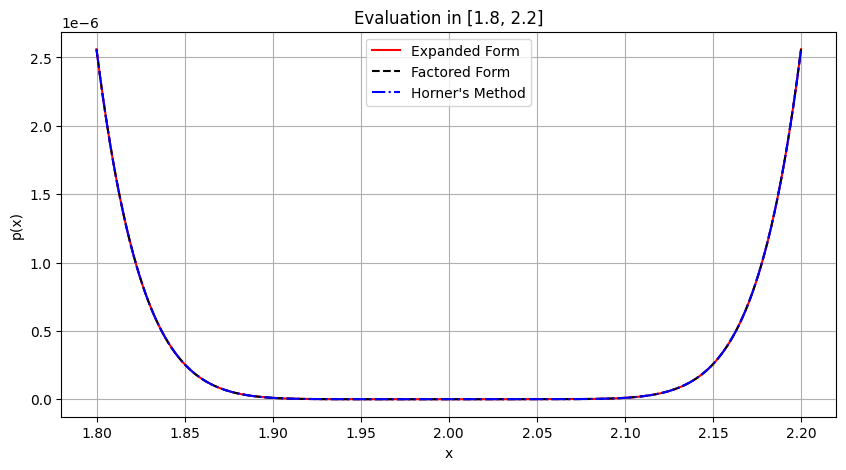

Interval [1.8, 2.2]:
  Max diff (Expanded vs Horner): 9.46e-12
  Max diff (Expanded vs Factored): 7.97e-12


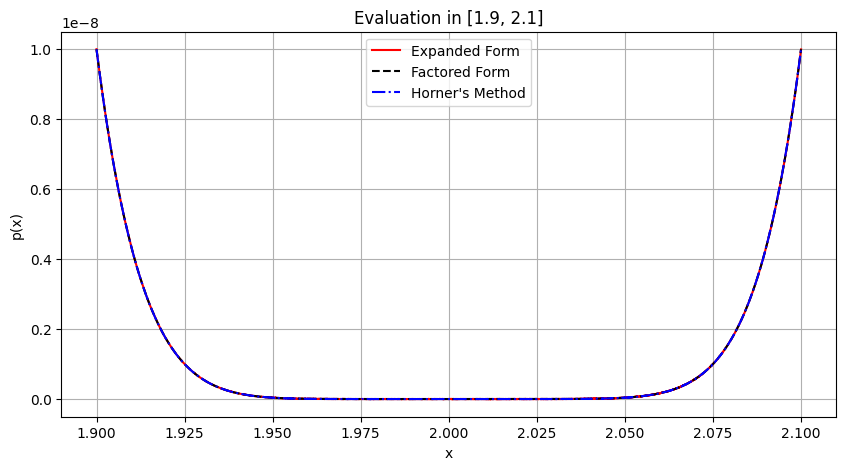

Interval [1.9, 2.1]:
  Max diff (Expanded vs Horner): 8.64e-12
  Max diff (Expanded vs Factored): 7.43e-12


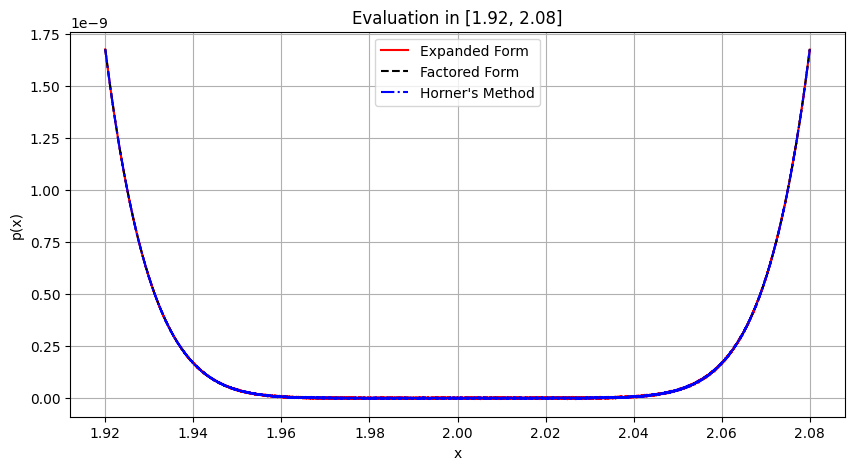

Interval [1.92, 2.08]:
  Max diff (Expanded vs Horner): 7.90e-12
  Max diff (Expanded vs Factored): 6.50e-12


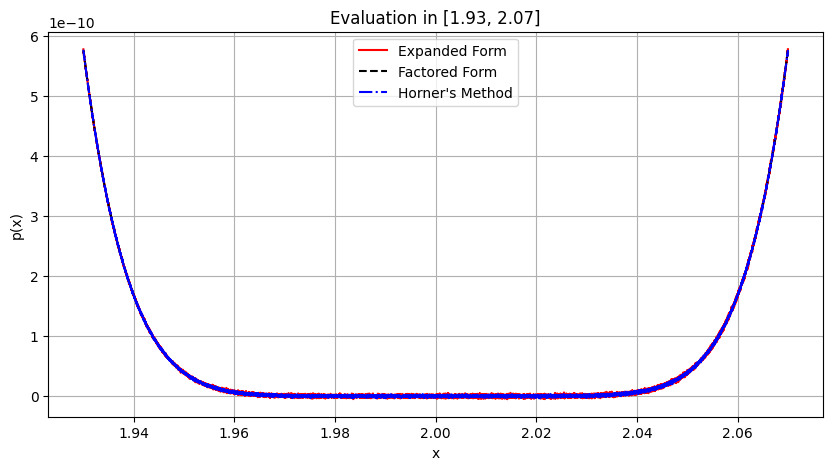

Interval [1.93, 2.07]:
  Max diff (Expanded vs Horner): 7.84e-12
  Max diff (Expanded vs Factored): 6.27e-12


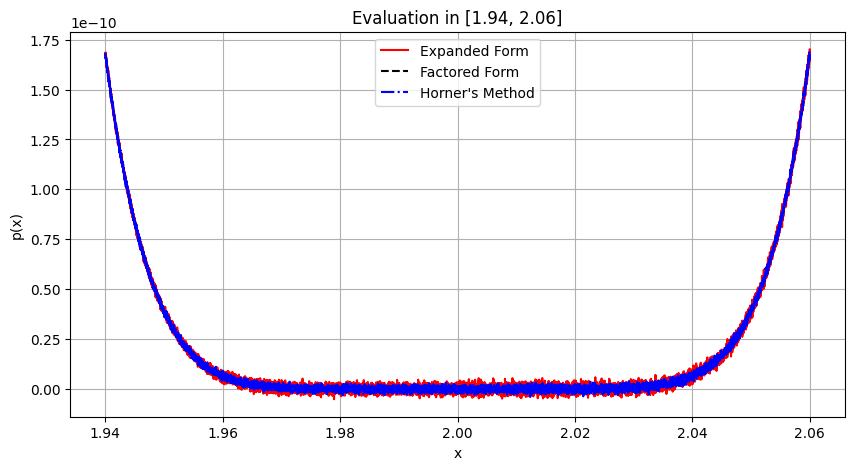

Interval [1.94, 2.06]:
  Max diff (Expanded vs Horner): 7.62e-12
  Max diff (Expanded vs Factored): 6.13e-12


In [7]:
import numpy as np
import matplotlib.pyplot as plt

a = np.array([256, -1024, 1792, -1792, 1120, -448, 112, -16, 1])

def expanded_form(x):
    return standard_poly(a, x)

def factored_form(x):
    return (x - 2.0)**8

intervals = [
    (1.8, 2.2),
    (1.9, 2.1),
    (1.92, 2.08),
    (1.93, 2.07),
    (1.94, 2.06)
]

n_points = 10000

for i, (left, right) in enumerate(intervals):
    x = np.linspace(left, right, n_points)
    
    y_exp = expanded_form(x)
    y_fact = factored_form(x)
    y_hor = horner(a, x)
    
    plt.figure(figsize=(10,5))
    plt.plot(x, y_exp, 'r-', label='Expanded Form')
    plt.plot(x, y_fact, 'k--', label='Factored Form')
    plt.plot(x, y_hor, 'b-.', label="Horner's Method")
    plt.title(f'Evaluation in [{left}, {right}]')
    plt.xlabel('x')
    plt.ylabel('p(x)')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    diff_eh = np.max(np.abs(y_exp - y_hor))
    diff_ef = np.max(np.abs(y_exp - y_fact))
    print(f"Interval [{left}, {right}]:")
    print(f"  Max diff (Expanded vs Horner): {diff_eh:.2e}")
    print(f"  Max diff (Expanded vs Factored): {diff_ef:.2e}")